<a href="https://colab.research.google.com/github/apisarathep/Global-Air-Pollution/blob/main/globalAirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>Term project</u> : Global Air Pollution Dataset

---

####1.Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

####2. Input Data

``dataframe`` named  **air**

In [ ]:
# read from a csv file located in google drive folder
air = pd.read_csv('/content/drive/MyDrive/project/global air pollution dataset.csv')
air

## Dataset

This data set contains AQI values of different pollutants for many cities all over the world.

 Dataset description:


*   Column 1 - ``Country`` : Name of the country
*   Column 2 - ``City`` : City
*   Column 3 - ``AQI Value`` : Overall AQI value of the city
*   Column 4 - ``AQI Category`` : Overall AQI category of the city
*   Column 5 - ``CO AQI Value`` : AQI value of Carbon Monoxide of the city
*   Column 6 - ``CO AQI Category`` : AQI category of Carbon Monoxide of the city
*   Column 7 - ``Ozone AQI Value`` : AQI value of Ozone of the city
*   Column 8 - ``Ozone AQI Category`` : AQI category of Ozone of the city
*   Column 9 - ``NO2 AQI Value`` : AQI value of Nitrogen Dioxide of the city
*   Column 10 - ``NO2 AQI Category`` : AQI category of Nitrogen Dioxide of the city
*   Column 11 - ``PM2.5 AQI Value`` : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
*   Column 12 - ``PM2.5 AQI Category`` : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

---

###3. Summary Information About Data Set

The ``info()`` method of class DataFrame gives us the quick overview of our dataset, e.g. total number of rows and columns, datatypes and number of null values if any

The ``describe()`` method of class DataFrame gives us statistical information of the dataset, e.g. mean, standard deviation, min, max, etc.

In [ ]:
air.info() # describe the general information of the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
air.describe() # Generate descriptive statistics corresponding to the data set.

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
air.head(10) # return the first 10 rows.

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


In [ ]:
# sort data from AQI Value column
aqi_df = air.sort_values(by=["AQI Value"] , ascending = True) # Sort the whole dataframe in decending order on the basis of the column "AQI Value"
aqi_df


---

###4. Data Cleansing

**Data cleansing** or data cleaning is the process of
* *detecting* and *correcting* (or *removing*) **corrupt** or **inaccurate** records from a record set, table, or database
* *identifying* **incomplete**, **incorrect**, **inaccurate** or **irrelevant parts** of the data and then *replacing*, *modifying*, or *deleting* the dirty or coarse data.

**Data cleansing** may be performed *interactively* with **data wrangling** tools, or as *batch processing* through **scripting**.

<u>Example</u>: the process of data cleansing may include:
* removing typographical errors
* validating and correcting values against a known list of entities
  * strictly checking the completeness of data
  * string matching against regular expression
* harmonization (or normalization) of data, which is the process of bringing together data of "varying file formats, naming conventions, and columns", and transforming it into one cohesive data set  



> **Data cleansing** differs from **data validation** in that validation almost invariably means **data is rejected** from the system at entry and is **performed at the time of entry**, rather than on batches of data.

---
Cleaning up data is the first and most important step, as it ensures the quality of the data is met to prepare data for visualisation.

We will explore some examples of data cleansing in this section. These are  handling missing data, and handling duplicates.

####4.1 Handling Missing Values

In pandas, missing data is referred to as ``NaN``, which stands for *Not a Number*. This ``NaN`` is analogus to ``NA``, which stands for *Not Available* in other programming languages. In statistics applications, ``NA`` of ``NaN`` data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example).

When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

To make detecting missing values easier (and across different array dtypes), Pandas provides the ``isnull()`` and ``notnull()`` functions, which are also methods on Series and DataFrame objects −

####Create a Boolean index (of the same size as the original dataframe) indicating NaN fields in the data set

In [ ]:
airpollu = air.isnull() # isnull() method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
airpollu

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
6657,False,False,False,False,False,False,False,False,False,False,False,False
1127,False,False,False,False,False,False,False,False,False,False,False,False
20585,False,False,False,False,False,False,False,False,False,False,False,False
2773,False,False,False,False,False,False,False,False,False,False,False,False
18573,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7486,False,False,False,False,False,False,False,False,False,False,False,False
23269,False,False,False,False,False,False,False,False,False,False,False,False
14502,False,False,False,False,False,False,False,False,False,False,False,False
9194,False,False,False,False,False,False,False,False,False,False,False,False


#### The number of NaN values in every column sorted descendingly

In [ ]:
airpollu.sum().sort_values(ascending=False) # sum() sum NaN value in every column
                                            # sort_values(ascending=False) sort the missing data

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

####Check that there is any row in the dataset with all NANs

In [ ]:
cleaned = air[airpollu.all(axis=1)] # isnull().all to check for all columns are NaNs
                                                # axis=1 rows that have NaNs atleast 1
                                                # cleaned = all the rows that has all NaNs
print("Number of rows with all NaNs =",cleaned.shape[0]) #shape.[0] is the number of rows
                                                         #print the number of rows with all NaNs

Number of rows with all NaNs = 0


####Fill missing values in every column with 0 and show how to verify that all NaN values in the specified columns have been replaced.

In [ ]:
print("---------------------------------")
print("Before Fill missing values")
print("---------------------------------")

df2 = pd.DataFrame(air[airpollu.any(axis=1)],columns=['City']) #select columns City for data is null
print (df2[df2['City'].isnull()]) #show columns City that is null before replace 0

print("---------------------------------")
print("City      \t",airpollu['City'].sum()) # check NaNs in City column for each row before replace 0
print("---------------------------------")
print("After Fill missing values with 0")
print("---------------------------------")

air['City'].fillna(0, inplace = True) #fill NaNs with 0 in company column
                                      #inplace = True is return nothing and the dataframe named booking is now updated.

print("City    \t",air['City'].isnull().sum()) # check NaNs in company column for each row after replace 0

---------------------------------
Before Fill missing values
---------------------------------
     City
2641  NaN
---------------------------------
City      	 1
---------------------------------
After Fill missing values with 0
---------------------------------
City    	 0


##### Fill all missing values in column 'country' with the most-frequently occurred (``mode``) value of the column.

In [ ]:
print(air.loc[535]) #show ค่าตำแหน่งที่ 535 คือ Country ตัวแรก และค่าจะเป็น NaN before fill missing value with mode
print("-----------------------------------------------------------")

df2 = pd.DataFrame(air[air.isnull().any(axis=1)],columns=['Country']) #select columns Country for data is null

print(df2[df2['Country'].isnull()]) #show columns Country that is null before replace
print("-----------------------------------------------------------")

x = air["Country"].mode()[0] #หาค่า mode ของ Country ว่าคือตัวอะไร
air["Country"].fillna(x, inplace = True) #fill NaNs with mode value in Country column

print ("Value mode of Country column : ", x) #Value mode of Country column
print("-----------------------------------------------------------")
print(air.loc[535]) #show ค่าตำแหน่งที่ 535 คือ Country ตัวแรก และค่าจะเป็น United States of America หลังจาก fill missing value with mode

Country                     NaN
City                  Granville
AQI Value                    30
AQI Category               Good
CO AQI Value                  1
CO AQI Category            Good
Ozone AQI Value              30
Ozone AQI Category         Good
NO2 AQI Value                 3
NO2 AQI Category           Good
PM2.5 AQI Value              25
PM2.5 AQI Category         Good
Name: 535, dtype: object
-----------------------------------------------------------
      Country
535       NaN
654       NaN
787       NaN
801       NaN
906       NaN
...       ...
22979     NaN
23115     NaN
23311     NaN
23345     NaN
23420     NaN

[427 rows x 1 columns]
-----------------------------------------------------------
Value mode of Country column :  United States of America
-----------------------------------------------------------
Country               United States of America
City                                 Granville
AQI Value                                   30
AQI Category         

####Verify that afterwards no missing values in the data set.

In [ ]:
airpollu.isnull().sum()
# .isnull() to check the dataset that still have NaN values or not
# .sum() returns all the values

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

####4.2 Handling Duplicates

* ``drop_duplicates()`` returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not
* ``drop_duplicates()`` returns a DataFrame where the duplicated array is False

####Check whether there is a duplicate in the given data set.

In [ ]:
print("Number of duplicate rows = ", air.duplicated().sum()) #returns all the numbers of duplicate rows

Number of duplicate rows =  0


####Drop all duplicate rows found in the given data set.

In [ ]:
print("Before drop Duplicate the number of duplicate rows = ", air.duplicated().sum()) #returns all the numbers of duplicate rows before drop Duplicate
print("\n___________________________________________________________\n")
air = air.drop_duplicates() #Drop all duplicate rows
print("check Duplicate  = ", air.duplicated().sum()) #check duplicates and returns all the values that all duplicate rows have been removed
print()
print("After drop duplicate data set remain was = ",air.shape[0]) # check remain number of rows count in booking after drop duplicate

Before drop Duplicate the number of duplicate rows =  0

___________________________________________________________

check Duplicate  =  0

After drop duplicate data set remain was =  23463


####5. Data Validity

####Identify how many rows in the data set that have zero guests including Ozone AQI Value

In [ ]:
zeroOzone = (air['Ozone AQI Value'] == 0) #select Ozone AQI Value = 0
print("Number of rows with total 0 Ozone AQI Value = ", zeroOzone.sum()) #returns all the numbers of Ozone AQI Value = 0

Number of rows with total 0 Ozone AQI Value =  103


#### Identify and print all indices of rows in the data set that have zero guests including Ozone AQI Value

In [ ]:
zeroOzone = (air['Ozone AQI Value'] == 0) #select Ozone AQI Value = 0
print("Indices of " ,zeroOzone.sum(), " rows with total 0 Ozone AQI Value are as follows:") #returns all the numbers of Ozone AQI Value = 0

airOzone = air[zeroOzone].index #check เงื่อนไขของ air โดย Ozone AQI Value ต้องเท่ากับ 0 และระบุแถวหรือindexที่ตรงตามเงื่อนไขออกมา

print(airOzone.values) #print ค่า index ของ Ozone AQI Value ที่เท่ากับ 0

Indices of  103  rows with total 0 Ozone AQI Value are as follows:
[   24   545   940  1175  1267  1398  1402  1502  1535  1800  1801  1904
  2014  2109  2120  2252  2273  2357  2610  2804  2844  2914  3066  3149
  3390  3477  3957  4493  4580  4701  4797  4886  5156  5199  5504  5545
  6513  7028  7382  7437  7567  7636  7691  8239  8316  8401  8817  8835
  8953  9489  9713  9728  9922 10102 10122 10394 10401 10766 11026 11138
 11140 11649 11867 12064 12227 12407 12718 12928 13036 13464 15178 15461
 15534 15589 15673 15928 16253 16318 16320 16788 17470 17626 17711 17897
 18200 19147 19854 20139 20151 20555 20961 20984 21468 21724 21765 21789
 21823 22154 22475 22591 22754 23091 23247]


#### Drop all rows in the data set that have zero guests including aOzone AQI Value
####Verify also that all rows with total 0 guests have been removed.

In [ ]:
print("check amount of data set that have zero Ozone AQI Value it is",zeroOzone.sum()) #return all the number that have zero Ozone AQI Value
print("\n_____________________________________________________________________________________________\n")
airOzone = air[zeroOzone].index #check เงื่อนไขของ air โดย Ozone AQI Value ต้องเท่ากับ 0 และระบุแถวหรือindexที่ตรงตามเงื่อนไขออกมา
for cc in airOzone: #วนลูปในการ drop แต่ละแถว
  air = air.drop(cc, axis=0) #ลบข้อมูลตาม index ที่เลือกมาแล้ว
zeroOzone = ((air['Ozone AQI Value'] == 0)) #check condition that have zero Ozone AQI Value
print("check condition again = ", zeroOzone.sum()) #check condition and returns all the number that all rows with zero Ozone AQI Value have been removed
print("\n___________________________________________________________\n")
air.info() #รายละเอียดของข้อมูล ณ ตอนนี้ว่ามีอะไรบ้าง
print("\n___________________________________________________________\n")
print("show remain rows after drop is ",air.shape[0]) # check remain number of rows count in air after drop

check amount of data set that have zero Ozone AQI Value it is 103

_____________________________________________________________________________________________

check condition again =  0

___________________________________________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23360 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23360 non-null  object
 1   City                23360 non-null  object
 2   AQI Value           23360 non-null  int64 
 3   AQI Category        23360 non-null  object
 4   CO AQI Value        23360 non-null  int64 
 5   CO AQI Category     23360 non-null  object
 6   Ozone AQI Value     23360 non-null  int64 
 7   Ozone AQI Category  23360 non-null  object
 8   NO2 AQI Value       23360 non-null  int64 
 9   NO2 AQI Category    23360 non-null  object
 10  PM2.5 AQI Value     23360 non-null  int64 
 11  PM2.5 AQI C

####Identify and print all indices of rows in the data set that have zero guests including NO2 AQI Value

In [ ]:
zeroCO_NO2 = ((air['CO AQI Value'] == 0) & (air['NO2 AQI Value'] == 0)) #select CO AQI Value and NO2 AQI Value = 0

print("Number of rows with total 0 CO AQI Value and NO2 AQI Value = ", zeroCO_NO2.sum()) #returns all the numbers of CO AQI Value and NO2 AQI Value = 0
print("Indices of " ,zeroCO_NO2.sum(), " rows with total 0 CO AQI Value and NO2 AQI Value are as follows:")

airCO_NO2 = air[zeroCO_NO2].index #check เงื่อนไขของ air โดย CO AQI Value และ NO2 AQI Value ต้องเท่ากับ 0 และระบุแถวหรือindexที่ตรงตามเงื่อนไขออกมา

print(airCO_NO2.values) #print ค่า index ของ CO AQI Value และ NO2 AQI Value ที่เท่ากับ 0

Number of rows with total 0 CO AQI Value and NO2 AQI Value =  2082
Indices of  2082  rows with total 0 CO AQI Value and NO2 AQI Value are as follows:
[    4    41    50 ... 23427 23431 23454]


####Drop all rows in the data set that have zero guests including NO2 AQI Value
####Verify also that all rows with total 0 guests have been removed.

In [ ]:
print("check amount of data set that have zero CO AQI Value and NO2 AQI Value it is",zeroCO_NO2.sum()) #return all the number that have zero CO AQI Value and NO2 AQI Value
print("\n_____________________________________________________________________________________________\n")
airCO_NO2 = air[zeroCO_NO2].index #check เงื่อนไขของ air โดย CO AQI Value และ NO2 AQI Value ต้องเท่ากับ 0 และระบุแถวหรือindexที่ตรงตามเงื่อนไขออกมา
for cc in airCO_NO2: #วนลูปในการ drop แต่ละแถว
  air = air.drop(cc, axis=0) #ลบข้อมูลตาม index ที่เลือกมาแล้ว
zeroCO_NO2 = ((air['CO AQI Value'] == 0) & (air['NO2 AQI Value'] == 0)) #check condition that have zero CO AQI Value and NO2 AQI Value
print("check condition again = ", zeroCO_NO2.sum()) #check condition and returns all the number that all rows with zero CO AQI Value and NO2 AQI Value have been removed
print("\n___________________________________________________________\n")
air.info() #รายละเอียดของข้อมูล ณ ตอนนี้ว่ามีอะไรบ้าง
print("\n___________________________________________________________\n")
print("show remain rows after drop is ",air.shape[0]) # check remain number of rows count in air after drop

check amount of data set that have zero CO AQI Value and NO2 AQI Value it is 2082

_____________________________________________________________________________________________

check condition again =  0

___________________________________________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21278 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             21278 non-null  object
 1   City                21278 non-null  object
 2   AQI Value           21278 non-null  int64 
 3   AQI Category        21278 non-null  object
 4   CO AQI Value        21278 non-null  int64 
 5   CO AQI Category     21278 non-null  object
 6   Ozone AQI Value     21278 non-null  int64 
 7   Ozone AQI Category  21278 non-null  object
 8   NO2 AQI Value       21278 non-null  int64 
 9   NO2 AQI Category    21278 non-null  object
 10  PM2.5 AQI Value     21278 non-null  int64 


###6.Data Wrangling

Data wrangling involves processing the data in various formats like - merging, grouping, concatenating, etc. for the purpose of analysing or getting them ready to be used with another set of data.

* Grouping Data

Grouping data sets is a frequent need in data analysis where we need the result in terms of various groups present in the data set. Pandas has in-built methods ``groupby()`` which can roll the data into various groups.

In the following example, data is first grouped by ``Country``. Then, we get the result for a specific country.

####Compute The total number of CO AQI Value in France.

In [ ]:
grouped_Country = air.groupby('Country') # applying groupby() function to group the data on Country value.
grouped_sum_Country = grouped_Country.get_group('France').reset_index(drop=True) # get_group() selecting a single group
                                                                 # reset_index() we reset the index, the old index is added as a column, and a new sequential index is used
                                                                 # use the drop parameter to avoid the old index being added as a column
print(grouped_sum_Country.loc[::,['Country','City','CO AQI Value','CO AQI Category']]) # เรียกใช้ group_sum.loc[] เป็น series เพื่อดึงข้อมูลชื่อของคอลัมน์ทั้งหมด
print()
print("The total number of CO AQI Value in France is",grouped_Country['CO AQI Value'].get_group('France').sum()) #print จำนวน CO AQI Value ในประเทศ France

    Country             City  CO AQI Value CO AQI Category
0    France          Raismes             1            Good
1    France       Pontarlier             1            Good
2    France       Haubourdin             1            Good
3    France  Aix En Provence             1            Good
4    France      Armentieres             0            Good
..      ...              ...           ...             ...
754  France          Etampes             1            Good
755  France            Creil             1            Good
756  France     Villeurbanne             1            Good
757  France           Soyaux             1            Good
758  France           Sceaux             1            Good

[759 rows x 4 columns]

The total number of CO AQI Value in France is 812


####Compute the total number of Ozone AQI Value in Good Ozone AQI Category.

In [ ]:
grouped_Ozone = air.groupby('Ozone AQI Category') # applying groupby() function to group the data on Ozone AQI Category
grouped_sum_Ozone = grouped_Ozone.get_group('Good').reset_index(drop=True) #get group ของ Good ใน Ozone AQI Category
print(grouped_sum_Ozone.loc[::,['City','Ozone AQI Value','Ozone AQI Category']]) # เรียกใช้ group_sum.loc[] เป็น series เพื่อดึงข้อมูลชื่อของคอลัมน์ City, Ozone AQI Value, Ozone AQI Category
print()
print("The total number of Ozone AQI Value in Good Ozone AQI Category is",grouped_Ozone['Ozone AQI Value'].get_group('Good').sum()) #print ผลรวมจำนวน Ozone AQI Value ใน Ozone AQI Category ที่มัน Good

                   City  Ozone AQI Value Ozone AQI Category
0            Praskoveya               36               Good
1      Presidente Dutra                5               Good
2       Priolo Gargallo               39               Good
3             Przasnysz               34               Good
4           Punta Gorda               14               Good
...                 ...              ...                ...
18880            Martin               39               Good
18881            Sceaux               20               Good
18882          Mormugao               22               Good
18883       Westerville               44               Good
18884            Marang               38               Good

[18885 rows x 3 columns]

The total number of Ozone AQI Value in Good Ozone AQI Category is 536802


####Compute the total number of NO2 AQI Value that is 1.

In [ ]:
grouped_NO2 = air.groupby('NO2 AQI Value') # applying groupby() function to group the data on NO2 AQI Value
grouped_sum_NO2 = grouped_NO2.get_group(1).reset_index(drop=True) #get group ของ 1 ใน NO2 AQI Value
print(grouped_sum_NO2.loc[::,['Country','NO2 AQI Value','NO2 AQI Category']]) # เรียกใช้ group_sum.loc[] เป็น series เพื่อดึงข้อมูลชื่อของคอลัมน์ Country, NO2 AQI Value, NO2 AQI Category
print()
print("The total number of NO2 AQI Value that is 1 :",grouped_NO2['NO2 AQI Value'].get_group(1).sum()) #print จำนวน NO2 AQI Value ที่มีค่าเท่ากับ 1

                       Country  NO2 AQI Value NO2 AQI Category
0                       Brazil              1             Good
1           Russian Federation              1             Good
2                        China              1             Good
3                        India              1             Good
4                     Pakistan              1             Good
...                        ...            ...              ...
4659  United States of America              1             Good
4660                 Sri Lanka              1             Good
4661                     China              1             Good
4662                  Slovakia              1             Good
4663                     India              1             Good

[4664 rows x 3 columns]

The total number of NO2 AQI Value that is 1 : 4664


####Compute the total number of PM 2.5 AQI Value each city

In [ ]:
air_City = air[air['Country'] == 'Republic of North Macedonia'][['PM2.5 AQI Value','City']].groupby('City').sum() #เลือกประเทศที่มีชื่อว่า Republic of North Macedonia
                                                                                                                  #group by City ว่าในประเทศนี้มีเมืองอะไรบ้าง
                                                                                                                  #ในแต่ละ City มีค่า AQI PM2.5 เท่าไหร่บ้าง
print(air_City) #print City กับ PM2.5 AQI Value ที่อยู่ในประเทศ Republic of North Macedonia

                  PM2.5 AQI Value
City                             
Aracinovo                      57
Berovo                         49
Bitola                         66
Bogovinje                      60
Bosilovo                       61
Brvenica                       83
Cegrane                       108
Debar                          62
Delcevo                        67
Dolna Banjica                  45
Dolneni                        59
Gevgelija                      81
Gostivar                       52
Ilinden                        69
Kamenjane                      60
Kavadarci                      58
Kicevo                         63
Kocani                         58
Kratovo                        62
Kriva Palanka                  77
Kumanovo                       53
Lipkovo                        86
Negotino                       59
Negotino Polosko              114
Novo Selo                      64
Ohrid                          42
Oslomej                        45
Prilep        

####Plot a bar chart for visualizing the total number of PM2.5 AQI Value in Republic of North Macedonia By City

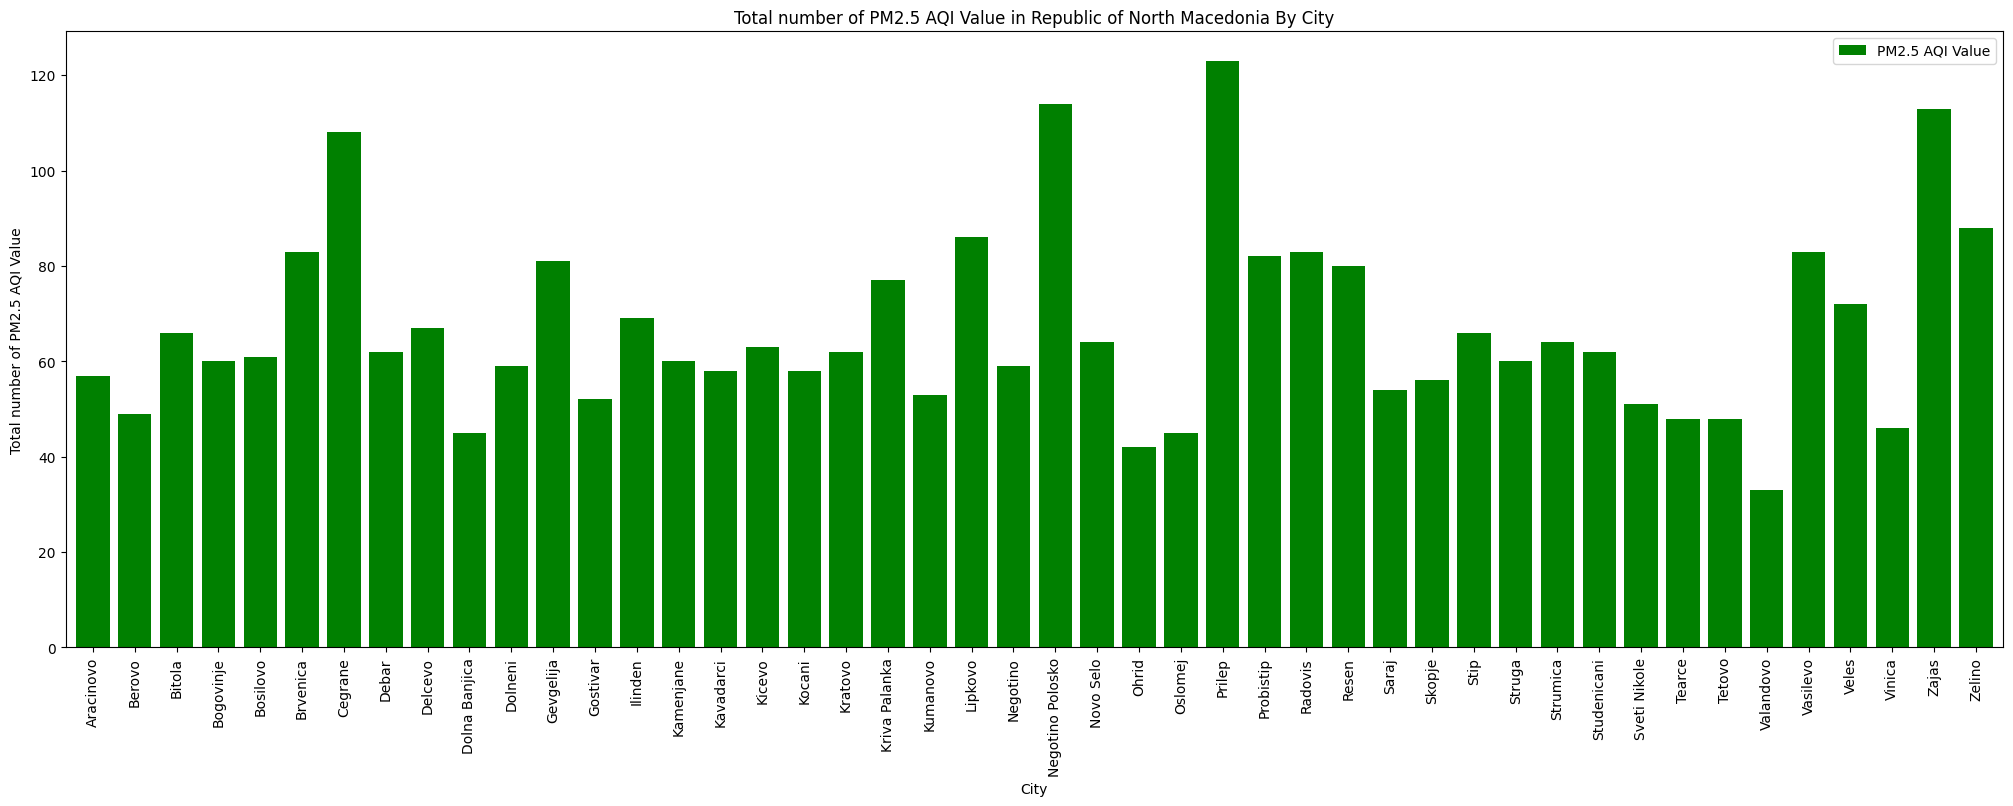

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default') #ใช้สไตล์กราฟแบบ default
plt.rcParams['figure.figsize']= [25, 8] #fig graph with width=25 and height=8

air_City.plot(kind='bar',color='green', width=0.8) #plot ด้วย bar และกราฟแต่ละแท่งจะมีสีเขียว ด้วยความกว้าง 0.8

plt.title("Total number of PM2.5 AQI Value in Republic of North Macedonia By City") #print ข้อความ title ตรงกลางข้างบนกราฟ
plt.xlabel("City") #print ข้อความในแกน x
plt.ylabel("Total number of PM2.5 AQI Value") #print ข้อความในแกน y

plt.show() #show bar plot

####Compute the total number of AQI Value in each country

In [ ]:
group_Country = air[air['AQI Category'] == 'Very Unhealthy'][['AQI Value','Country']].groupby('Country').sum() # เลือก Very Unhealthy ใน AQI Category
                                                                                                               # group by Country ว่าใน Very Unhealthy AQI Category มีอะไรบ้าง
                                                                                                               # ในแต่ละ Country มีค่า AQI เท่าไหร่บ้าง
print(group_Country) #print Country กับ AQI Value ที่อยู่ใน Very Unhealthy AQI Category

                                  AQI Value
Country                                    
Angola                                  285
Australia                               264
Bangladesh                              428
Brazil                                  720
Chile                                   207
China                                  8951
Democratic Republic of the Congo       1497
India                                 29876
Indonesia                              3568
Iran (Islamic Republic of)              881
Malaysia                                209
Mauritania                              224
Mexico                                 4211
Namibia                                 204
Nepal                                   667
Nigeria                                 632
Pakistan                               5459
Russian Federation                      214
Senegal                                 211
South Africa                           3504
United States of America        

####Plot a bar chart for visualizing the total number of AQI Value in Very Unhealthy By Country

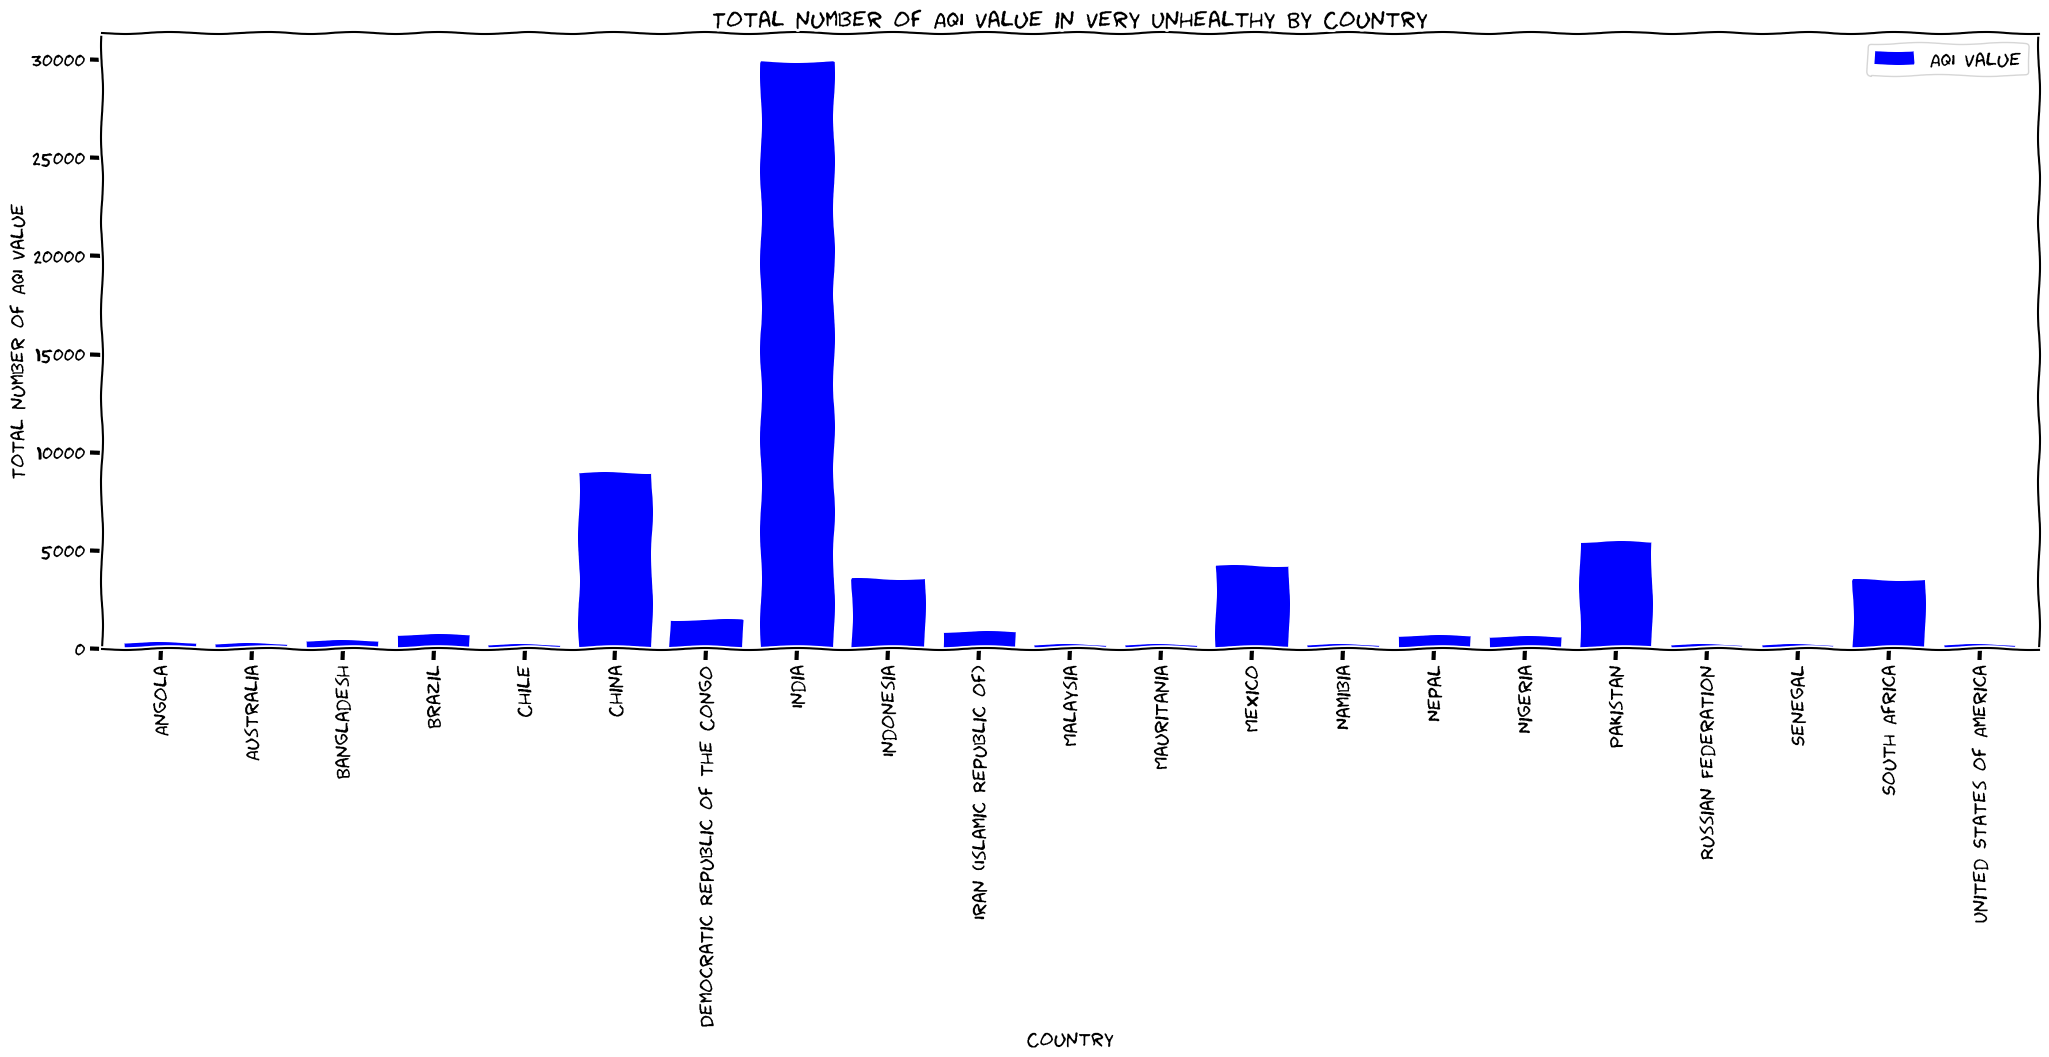

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xkcd() # This figure will be in XKCD-style
plt.rcParams['figure.figsize']= [25, 8] #fig graph with width=25 and height=8

group_Country.plot(kind='bar',color='blue', width=0.8) #plot ด้วย bar และกราฟแต่ละแท่งจะมีสีฟ้า ด้วยความกว้าง 0.8

plt.title("Total number of AQI Value in Very Unhealthy By Country") #print ข้อความ title ตรงกลางข้างบนกราฟ
plt.xlabel("Country") #print ข้อความในแกน x
plt.ylabel("Total number of AQI Value") #print ข้อความในแกน y

plt.show() #show bar plot

####Find out the country names where having Moderate CO AQI Category

In [ ]:
air_Moderate =  air[air['CO AQI Category'] == 'Moderate']['Country'].unique() # Create the unique and the index Country in Moderate CO AQI Category
print('There are',len(air_Moderate),'out of',len(air['Country']),'Country having Moderate CO AQI Category. They are as follows: \n{}'.format(air_Moderate))
# print length of Country in Moderate CO AQI Category and length of all Country in dataframe
# print format array ของ Country in Moderate CO AQI Category

There are 2 out of 21278 Country having Moderate CO AQI Category. They are as follows: 
['Malaysia' 'Democratic Republic of the Congo']


####Find out the country names where having Good Ozone AQI Category

In [ ]:
air_good =  air[air['Ozone AQI Category'] == 'Good']['City'].unique() # Create the unique and the index City in Good Ozone AQI Category
print('There are',len(air_good),'out of',len(air['City']),'City having Good Ozone AQI Category. They are as follows: \n{}'.format(air_good))
# print length of City in Good Ozone AQI Category and length of all City in dataframe
# print format array ของ City in Good Ozone AQI Category

There are 18885 out of 21278 City having Good Ozone AQI Category. They are as follows: 
['Praskoveya' 'Presidente Dutra' 'Priolo Gargallo' ... 'Mormugao'
 'Westerville' 'Marang']


####7. Data Visualization
Data Visualization help to easily understand the complex problem. They help in identifying patterns, relationships, and outliers in data. In addition, data visualization is also an effective and meaningful manner for displaying the results.

####Matplotlib : Scatter Plot for PM2.5 AQI Value at AQI Value By group CO AQI Value

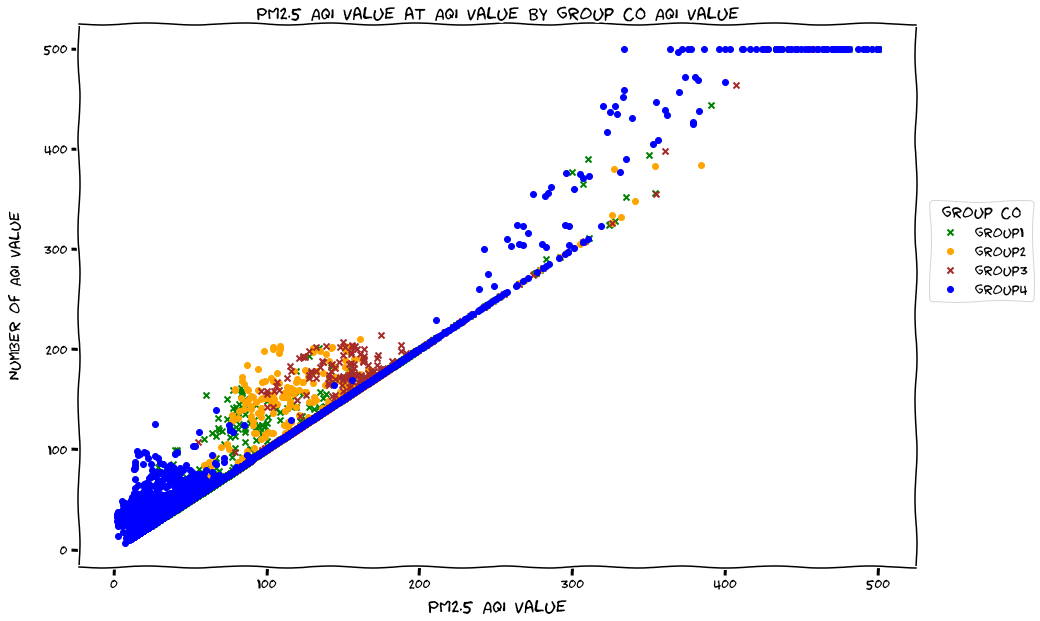

In [ ]:
%matplotlib inline

plt.xkcd() # This figure will be in XKCD-style

plt.rcParams['figure.figsize'] = [15, 10]  #fig graph with width=15 and height=10

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'} # กำหนด font ตรงกลางที่จะเขียนข้อความ ด้วย font 18 และ ความกว้างเป็นตัวหนา

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'} # กำหนด font แกน x ที่จะเขียนข้อความให้เป็น center ด้วย font 18 และ ความกว้างเป็นตัวหนา

fontdicty={'fontsize': 16,
          'weight' : 'bold',
          'verticalalignment': 'baseline', # Baseline เป็นการจัดตำแหน่งข้อความกำหนดเป็นค่าเริ่มต้นปกติ
          'horizontalalignment': 'center'} # กำหนด font แกน y ที่จะเขียนข้อความให้เป็น center ด้วย font 16 และ ความกว้างเป็นตัวหนา

group1 = plt.scatter('PM2.5 AQI Value', 'AQI Value', data=air[air['CO AQI Value']==2], marker='x', color='green') # plot scatter โดยจุดที่ plot ให้เป็น CO AQI Value = 2 และแกน x คือ PM2.5 AQI Value และแกน y คือ AQI Value โดยจะ plot เป็น x
group2 = plt.scatter('PM2.5 AQI Value', 'AQI Value', data=air[air['CO AQI Value']==3], marker='o', color='orange') # plot scatter โดยจุดที่ plot ให้เป็น CO AQI Value = 3 และแกน x คือ PM2.5 AQI Value และแกน y คือ AQI Value โดยจะ plot เป็น o
group3 = plt.scatter('PM2.5 AQI Value', 'AQI Value', data=air[air['CO AQI Value']==4], marker='x', color='brown')
group4 = plt.scatter('PM2.5 AQI Value', 'AQI Value', data=air[air['CO AQI Value']==1], marker='o', color='blue')

#กำหนดว่าแต่ละ group จัดอยู่หมวดไหน และแต่ละ group ใช้ font ,scatterpoints อะไรบ้าง
plt.legend(handles=(group1,group2,group3,group4),
           labels=('group1', 'group2', 'group3', 'group4'),
           title="group CO", title_fontsize=16,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)

#print แต่ละแกนออกมา
plt.title('PM2.5 AQI Value at AQI Value By group CO AQI Value', fontdict=fontdict, color="black")
plt.xlabel("PM2.5 AQI Value", fontdict=fontdictx, labelpad=10)
plt.ylabel("Number of AQI Value", fontdict=fontdicty, labelpad=25);

####Matplotlib : Scatter Plot for Ozone AQI Value at AQI Value By group PM2.5 AQI Value

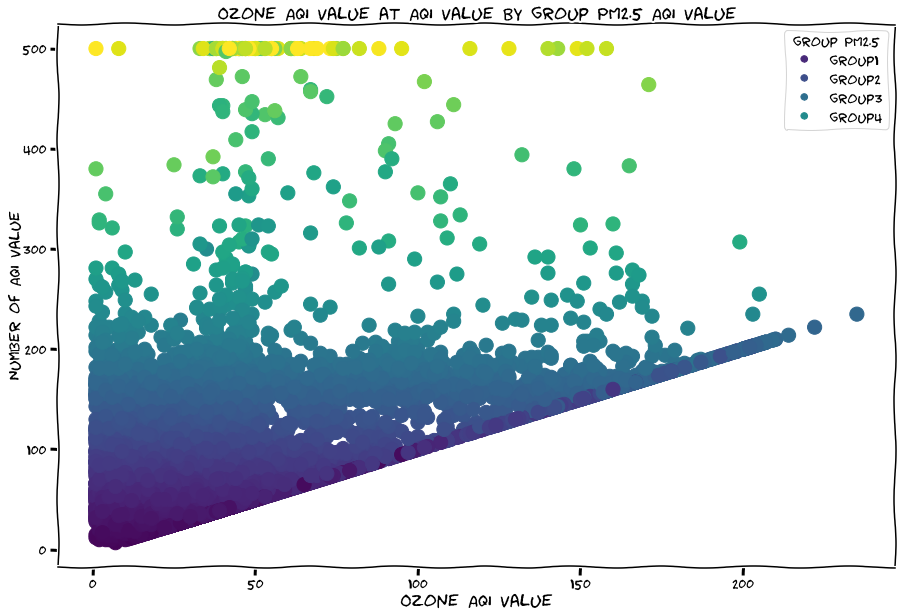

In [ ]:
%matplotlib inline

plt.xkcd() # This figure will be in XKCD-style

fig, ax = plt.subplots(figsize=(15,10)) #fig graph with width=15 and height=10

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}  # กำหนด font ตรงกลางที่จะเขียนข้อความ ด้วย font 18 และ ความกว้างเป็นตัวหนา

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'} # กำหนด font แกน x ที่จะเขียนข้อความให้เป็น center ด้วย font 18 และ ความกว้างเป็นตัวหนา

fontdicty={'fontsize': 16,
          'weight' : 'bold',
          'verticalalignment': 'baseline',# Baseline เป็นการจัดตำแหน่งข้อความกำหนดเป็นค่าเริ่มต้นปกติ
          'horizontalalignment': 'center'} # กำหนด font แกน y ที่จะเขียนข้อความให้เป็น center ด้วย font 16 และ ความกว้างเป็นตัวหนา

mysize = 200 #กำหนด size plot เป็น 200

scatter = ax.scatter('Ozone AQI Value', 'AQI Value', data=air, c='PM2.5 AQI Value', s=mysize) # plot scatter โดยจุดที่ plot ให้เป็น PM2.5 AQI Value และแกน x คือ Ozone AQI Value และแกน y คือ AQI Value โดยจะกำหนด size จาก mysize

# produce a legend with the unique colors from the scatter
legend_elem = list(scatter.legend_elements())
legend_elem[1] = ['group1', 'group2', 'group3', 'group4']
legend_group = ax.legend(*legend_elem,
                           loc="upper right", title="group PM2.5" )
ax.add_artist(legend_group)

#print แต่ละแกนออกมา
ax.set_title('Ozone AQI Value at AQI Value By group PM2.5 AQI Value', fontdict=fontdict, color="black")
ax.set_xlabel("Ozone AQI Value", fontdict=fontdictx)
ax.set_ylabel("Number of AQI Value", fontdict=fontdicty)

plt.show() #show scatter plot

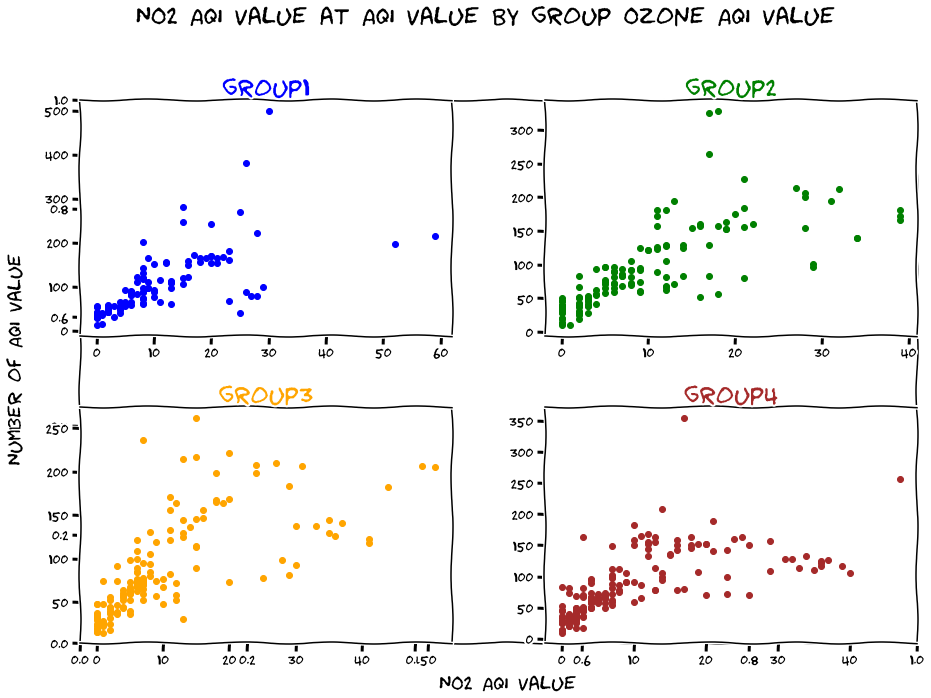

In [ ]:
plt.xkcd() # This figure will be in XKCD-style

fig, ax = plt.subplots(figsize=(15,10)) #fig graph with width=15 and height=10

plt.rcParams["font.weight"] = "bold" # ความกว้างของตัวอักษรกำหนดเป็นตัวหนา

fontdict={'fontsize': 25,
          'weight' : 'bold'} # กำหนด font ตรงกลางที่จะเขียนข้อความ ด้วย font 25 และ ความกว้างเป็นตัวหนา

fontdicty={'fontsize': 20,
          'weight' : 'bold',
          'verticalalignment': 'baseline',# Baseline เป็นการจัดตำแหน่งข้อความกำหนดเป็นค่าเริ่มต้นปกติ
          'horizontalalignment': 'center'} # กำหนด font แกน y ที่จะเขียนข้อความให้เป็น center ด้วย font 16 และ ความกว้างเป็นตัวหนา

fontdictx={'fontsize': 20,
          'weight' : 'bold',
          'horizontalalignment': 'center'} # กำหนด font แกน x ที่จะเขียนข้อความให้เป็น center ด้วย font 18 และ ความกว้างเป็นตัวหนา

plt.subplots_adjust(wspace=0.25, hspace=0.3) #subplot คือกราฟย่อย เราจะสร้างกราฟย่อยลงบนกราฟ

fig.suptitle('NO2 AQI Value at AQI Value By group Ozone AQI Value', fontsize=25,fontweight="bold", color="black",
             position=(0.5,1.01)) # กำหนด title ไว้ในหัวข้อตรงกลางด้านบน

#เขียนแต่ละ subplot
ax1 = fig.add_subplot(221) #add subplot ไว้ในช่องแรกซ้ายบน
ax1.scatter('NO2 AQI Value', 'AQI Value', data=air[air['Ozone AQI Value']==1], c="blue") # plot scatter โดยจุดที่ plot ให้เป็น Ozone AQI Value = 1 และแกน x คือ NO2 AQI Value และแกน y คือ AQI Value
ax1.set_title('group1', fontdict=fontdict, color="blue") #กำหนด title ให้ group1
ax1.set_ylabel("Number of AQI Value", fontdict=fontdicty, position=(0,-0.1), labelpad=25) #กำหนดที่จะเขียนบน แกนy

ax2 = fig.add_subplot(222) #add subplot ไว้ในช่องสองขวาบน
ax2.scatter('NO2 AQI Value', 'AQI Value', data=air[air['Ozone AQI Value']==2], c="green") # plot scatter โดยจุดที่ plot ให้เป็น Ozone AQI Value = 2 และแกน x คือ NO2 AQI Value และแกน y คือ AQI Value
ax2.set_title('group2', fontdict=fontdict, color="green") #กำหนด title ให้ group2

ax3 = fig.add_subplot(223) #add subplot ไว้ในช่องสามซ้ายล่าง
ax3.scatter('NO2 AQI Value', 'AQI Value', data=air[air['Ozone AQI Value']==3], c="orange") # plot scatter โดยจุดที่ plot ให้เป็น Ozone AQI Value = 3 และแกน x คือ NO2 AQI Value และแกน y คือ AQI Value
ax3.set_title('group3', fontdict=fontdict, color="orange") #กำหนด title ให้ group3

ax4 = fig.add_subplot(224) #add subplot ไว้ในช่องสี่ขวาล่าง
ax4.scatter('NO2 AQI Value', 'AQI Value', data=air[air['Ozone AQI Value']==4], c="brown") # plot scatter โดยจุดที่ plot ให้เป็น Ozone AQI Value = 4 และแกน x คือ NO2 AQI Value และแกน y คือ AQI Value
ax4.set_title("group4", fontdict=fontdict, color="brown") #กำหนด title ให้ group4
ax4.set_xlabel("NO2 AQI Value", fontdict=fontdictx, position=(-0.1,0), labelpad=10); #กำหนดที่จะเขียนบน แกน x



####Matplotlib: Scatter Plots: Subpolots for CO AQI Value at AQI Value By group NO2 AQI Value

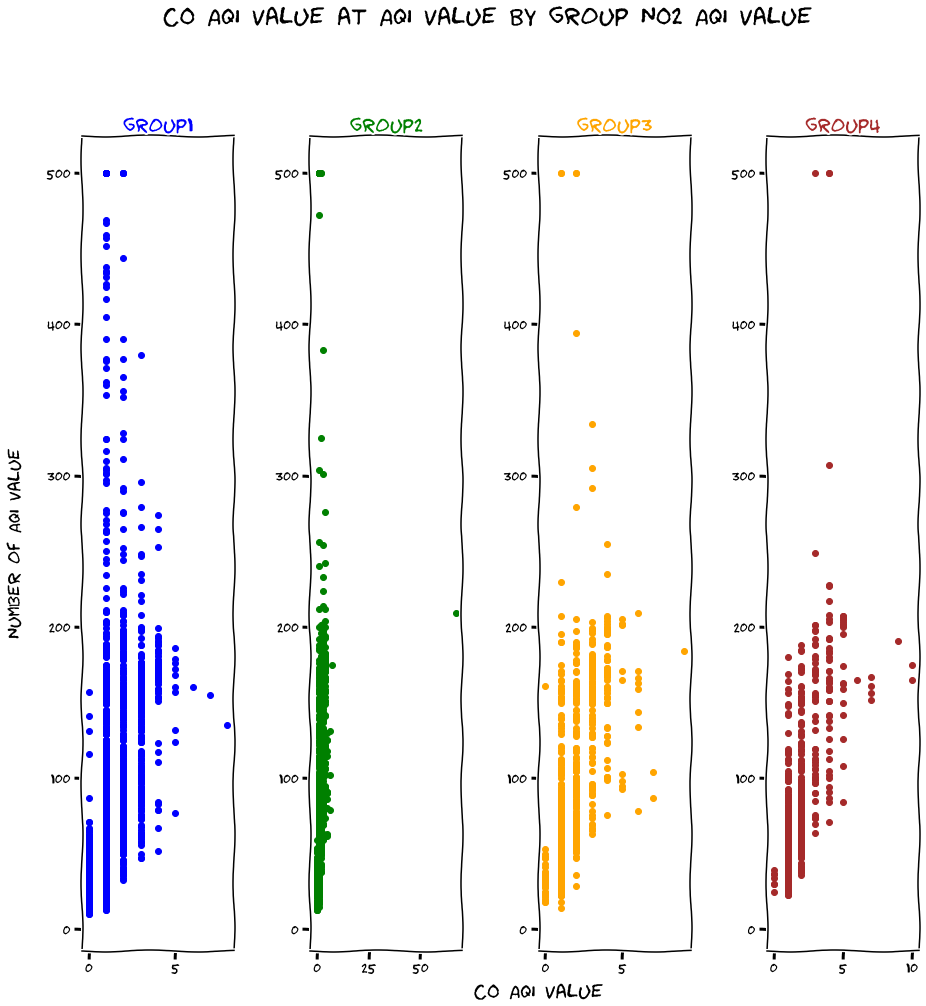

In [ ]:
plt.xkcd() # This figure will be in XKCD-style

fig = plt.figure() #fig graph normal

plt.rcParams['figure.figsize'] = [7,7] #fig graph with width=7 and height=7
plt.rcParams["font.weight"] = "bold" # ความกว้างของตัวอักษรกำหนดเป็นตัวหนา

fontdict={'fontsize': 20,
          'weight' : 'bold'} # กำหนด font ตรงกลางที่จะเขียนข้อความ ด้วย font 20 และ ความกว้างเป็นตัวหนา

plt.subplots_adjust(wspace=0.5) #สร้างแต่ละกราฟย่อย ด้วยความกว้าง 0.5
fontdicty1={'fontsize': 18,
          'weight' : 'bold'}

fig.suptitle('CO AQI Value at AQI Value By group NO2 AQI Value', fontsize=25,fontweight="bold", color="black",
             position=(0.5,1.0)) # กำหนด title ไว้ในหัวข้อตรงกลางด้านบน

ax3 = fig.add_subplot(143, sharey=ax3)
ax3.scatter('CO AQI Value', 'AQI Value', data=air.loc[air['NO2 AQI Value']==3], c="orange") # plot scatter โดยจุดที่ plot ให้เป็น NO2 AQI Value = 3 และแกน x คือ CO AQI Value และแกน y คือ AQI Value
ax3.set_title('group3', fontdict=fontdict,color="orange") #กำหนด title ให้ group3


ax1 = fig.add_subplot(141, sharey=ax3) #add subplot ไว้ในช่องแรกซ้ายบน
ax1.scatter('CO AQI Value', 'AQI Value', data=air.loc[air['NO2 AQI Value']==1], c="blue") # plot scatter โดยจุดที่ plot ให้เป็น NO2 AQI Value = 1 และแกน x คือ CO AQI Value และแกน y คือ AQI Value
ax1.set_title('group1', fontdict=fontdict, color="blue") #กำหนด title ให้ group1
ax1.set_ylabel("Number of AQI Value", fontdict=fontdicty1, position=(0.5,0.5), labelpad=25) #กำหนดที่จะเขียนบน แกน y


ax2 = fig.add_subplot(142, sharey=ax3)
ax2.scatter('CO AQI Value', 'AQI Value', data=air.loc[air['NO2 AQI Value']==2], c="green") # plot scatter โดยจุดที่ plot ให้เป็น NO2 AQI Value = 2 และแกน x คือ CO AQI Value และแกน y คือ AQI Value
ax2.set_title('group2', fontdict=fontdict, color="green") #กำหนด title ให้ group2


ax4 = fig.add_subplot(144, sharey=ax3)
ax4.scatter('CO AQI Value', 'AQI Value', data=air.loc[air['NO2 AQI Value']==4], c="brown") # plot scatter โดยจุดที่ plot ให้เป็น NO2 AQI Value = 4 และแกน x คือ CO AQI Value และแกน y คือ AQI Value
ax4.set_title('group4', fontdict=fontdict, color="brown") #กำหนด title ให้ group4
ax4.set_xlabel("CO AQI Value", fontdict=fontdictx, position=(-1.5,0), labelpad=10); #กำหนดที่จะเขียนบน แกน x

####8. Bar plot

####Count the number of China, Compute the percentage of China and Plot a bar chart displaying total Number of AQI Category By China

Out of 21278 Country, there were 779 which are China
This accounted for 3.66 percent.



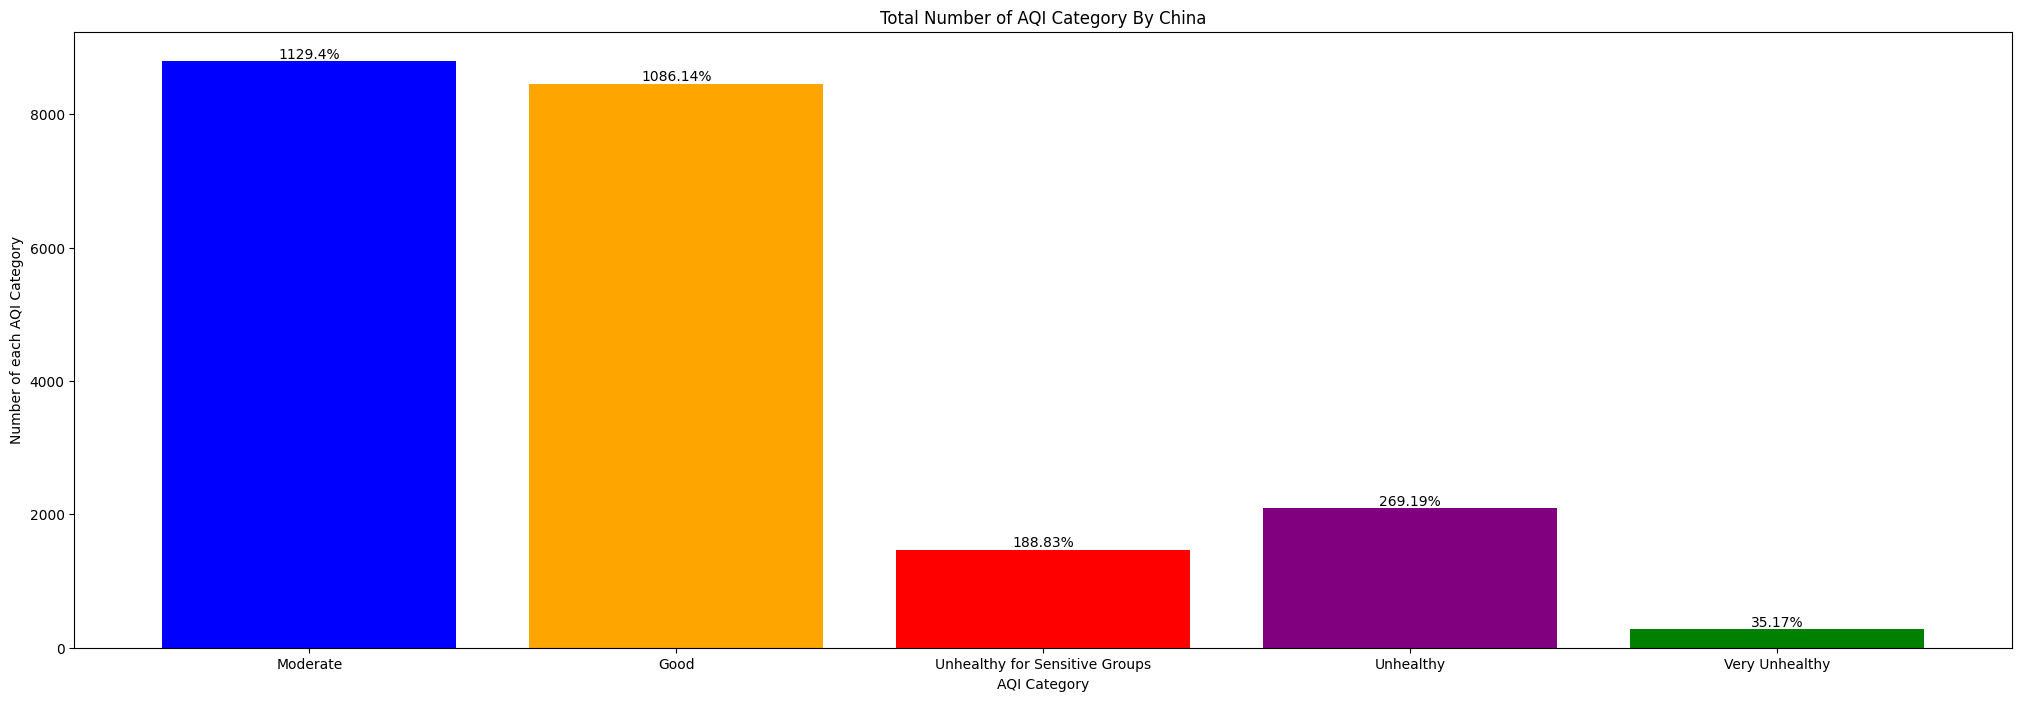

In [ ]:
air_china = air[air['Country'] == 'China'].shape[0] #จำนวนของ China ในคอลัมน์ Country

print("Out of",air['Country'].shape[0], "Country, there were", air_china,"which are China") # air['Country'].shape[0] = จำนวน Country ทั้งหมด
print("This accounted for" ,round((air_china / air['Country'].shape[0]) * 100,2) ,"percent.") #percent ของ จำนวนของ China หาร กับ จำนวน Country ทั้งหมด และทำเป็นจุดทศนิยม 2 ตำแหน่ง
print()

air_Moderate = air[air['AQI Category'] == 'Moderate'].shape[0] #จำนวนของ Moderate AQI Category
air_Good = air[air['AQI Category'] == 'Good'].shape[0] #จำนวนของ Good AQI Category
air_Uhs = air[air['AQI Category'] == 'Unhealthy for Sensitive Groups'].shape[0] #จำนวนของ Unhealthy for Sensitive Groups AQI Category
air_Unhealthy = air[air['AQI Category'] == 'Unhealthy'].shape[0] #จำนวนของ Unhealthy AQI Category
air_VeryUnhealthy = air[air['AQI Category'] == 'Very Unhealthy'].shape[0] #จำนวนของ Very Unhealthy AQI Category

#สร้าง arry percentage and total
percentage = []
total = []
pct = (air_Moderate / air_china) * 100 #percent of Moderate AQI Category
percentage.append(round(pct,2)) #ทำเป็นทศนิยม 2 ตำแหน่ง
pct = (air_Good / air_china) * 100 #percent of Good AQI Category
percentage.append(round(pct,2))
pct = (air_Uhs / air_china) * 100 #percent of Unhealthy for Sensitive Groups AQI Category
percentage.append(round(pct,2))
pct = (air_Unhealthy / air_china) * 100 #percent of Unhealthy AQI Category
percentage.append(round(pct,2))
pct = (air_VeryUnhealthy / air_china) * 100 #percent of Very Unhealthy AQI Category
percentage.append(round(pct,2))

#ใส่จำนวนแต่ละ AQI Category ลงไปใน array total
total.append(air_Moderate)
total.append(air_Good)
total.append(air_Uhs)
total.append(air_Unhealthy)
total.append(air_VeryUnhealthy)

plt.style.use('default') # This figure will be in default-style

#กำหนดค่าที่จะใส่ในแกน x, y
x = ['Moderate','Good','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy']
y = (air_Moderate,air_Good,air_Uhs,air_Unhealthy,air_VeryUnhealthy)

plt.rcParams['figure.figsize']= [25, 8] #fig graph size with width=25 and height=8
bar1=plt.bar(x, y, width=0.8, color=['blue','orange','red','purple','green']) #กำหนด plot bar โดยมี แกนx, y, ความกว้าง 0.8, สีแต่ละ bar

#วนลูปการเขียน percentage ใน bar plot
i = 0
for r in bar1:
   height = r.get_height()
   width = r.get_width()
   plt.text(r.get_x() + r.get_width() / 2.0 , height, str(percentage[i])+'%' ,ha='center', va='bottom')
   i +=1

plt.xlabel("AQI Category")
plt.ylabel("Number of each AQI Category")
plt.title("Total Number of AQI Category By China")
plt.show()

####Compute, print, and plot the number of Moderate and good Ozone AQI Value By CO AQI Value

CO AQI Value  Ozone AQI Category            
0             Good                               1028
1             Good                              13926
              Moderate                            905
              Unhealthy                             2
              Unhealthy for Sensitive Groups       25
                                                ...  
36            Good                                  1
41            Good                                  1
49            Good                                  1
51            Good                                  1
67            Very Unhealthy                        1
Length: 62, dtype: int64



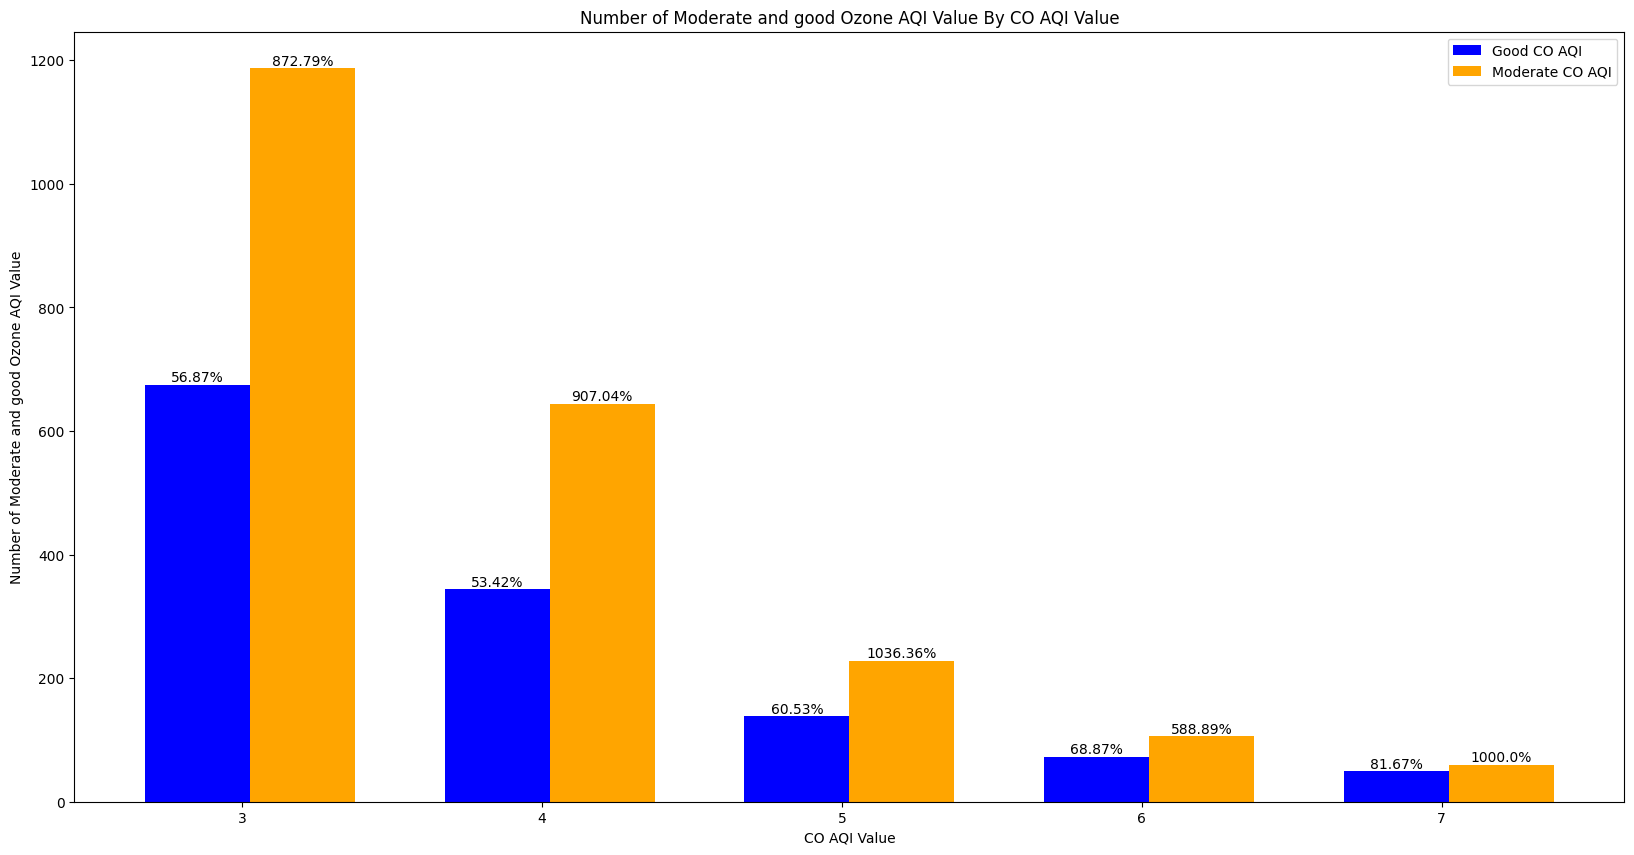

In [ ]:
air_CO_Ozone=air.groupby(['CO AQI Value','Ozone AQI Category']) #group CO AQI Value and Ozone AQI Category
print(air_CO_Ozone.size()) #print CO AQI Value and Ozone AQI Category and จำนวนแต่ละ Ozone AQI Category
print()

totalGood=air[air['Ozone AQI Category'] == 'Good'] #select Good Ozone AQI Category

totalGood3 = air[air['CO AQI Value'] == 3].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 3
totalGood4 = air[air['CO AQI Value'] == 4].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 4
totalGood5 = air[air['CO AQI Value'] == 5].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 5
totalGood6 = air[air['CO AQI Value'] == 6].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 6
totalGood7 = air[air['CO AQI Value'] == 7].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 7

total_in_Good3 = totalGood[totalGood['CO AQI Value'] == 3].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 3 ใน Good Ozone AQI Category
total_in_Good4 = totalGood[totalGood['CO AQI Value'] == 4].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 4 ใน Good Ozone AQI Category
total_in_Good5 = totalGood[totalGood['CO AQI Value'] == 5].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 5 ใน Good Ozone AQI Category
total_in_Good6 = totalGood[totalGood['CO AQI Value'] == 6].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 6 ใน Good Ozone AQI Category
total_in_Good7 = totalGood[totalGood['CO AQI Value'] == 7].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 7 ใน Good Ozone AQI Category

totalModerate = air[air['Ozone AQI Category'] == 'Moderate'] #select Moderate Ozone AQI Category

totalModerate3 = air[air['CO AQI Value'] == 3].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 3
totalModerate4 = air[air['CO AQI Value'] == 4].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 4
totalModerate5 = air[air['CO AQI Value'] == 5].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 5
totalModerate6 = air[air['CO AQI Value'] == 6].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 6
totalModerate7 = air[air['CO AQI Value'] == 7].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 7

total_in_Moderate3 = totalModerate[totalModerate['CO AQI Value'] == 3].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 3 ใน Moderate Ozone AQI Category
total_in_Moderate4 = totalModerate[totalModerate['CO AQI Value'] == 4].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 4 ใน Moderate Ozone AQI Category
total_in_Moderate5 = totalModerate[totalModerate['CO AQI Value'] == 5].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 5 ใน Moderate Ozone AQI Category
total_in_Moderate6 = totalModerate[totalModerate['CO AQI Value'] == 6].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 6 ใน Moderate Ozone AQI Category
total_in_Moderate7 = totalModerate[totalModerate['CO AQI Value'] == 7].shape[0] #จำนวนของ CO AQI Value ที่มีค่า 7 ใน Moderate Ozone AQI Category

#สร้าง arry perGood เพื่อใส่ percent
perGood = []
pct = (total_in_Good3 / totalGood3) * 100 #percent of CO AQI Value = 3 in Good Ozone AQI Category
perGood.append(round(pct,2)) #ทำเป็นทศนิยม 2 ตำแหน่ง
pct = (total_in_Good4 / totalGood4) * 100 #percent of CO AQI Value = 4 in Good Ozone AQI Category
perGood.append(round(pct,2))
pct = (total_in_Good5 / totalGood5) * 100 #percent of CO AQI Value = 5 in Good Ozone AQI Category
perGood.append(round(pct,2))
pct = (total_in_Good6 / totalGood6) * 100 #percent of CO AQI Value = 6 in Good Ozone AQI Category
perGood.append(round(pct,2))
pct = (total_in_Good7 / totalGood7) * 100 #percent of CO AQI Value = 7 in Good Ozone AQI Category
perGood.append(round(pct,2))

perModerate = []
pct = (totalModerate3 / total_in_Moderate3) * 100 #percent of CO AQI Value = 3 in Moderate Ozone AQI Category
perModerate.append(round(pct,2)) #ทำเป็นทศนิยม 2 ตำแหน่ง
pct = (totalModerate4 / total_in_Moderate4) * 100 #percent of CO AQI Value = 4 in Moderate Ozone AQI Category
perModerate.append(round(pct,2))
pct = (totalModerate5 / total_in_Moderate5) * 100 #percent of CO AQI Value = 5 in Moderate Ozone AQI Category
perModerate.append(round(pct,2))
pct = (totalModerate6 / total_in_Moderate6) * 100 #percent of CO AQI Value = 6 in Moderate Ozone AQI Category
perModerate.append(round(pct,2))
pct = (totalModerate7 / total_in_Moderate7) * 100 #percent of CO AQI Value = 7 in Moderate Ozone AQI Category
perModerate.append(round(pct,2))

plt.style.use('default') # This figure will be in default-style

X = ['3','4','5','6','7'] #กำหนดค่าที่จะใส่ในแกน x

airgood = (total_in_Good3,total_in_Good4,total_in_Good5,total_in_Good6,total_in_Good7) #กำหนดค่าที่จะใส่ในแกน y ด้านซ้าย ของแต่ละแท่ง
airmoderate = (totalModerate3,totalModerate4,totalModerate5,totalModerate6,totalModerate7) #กำหนดค่าที่จะใส่ในแกน y ด้านขวา ของแต่ละแท่ง

X_axis = np.arange(len(X))

fig = plt.subplots(figsize =(20, 10))

barGoodAir = plt.bar(X_axis - 0.15, airgood, 0.35, label = 'Good CO AQI', color='blue') #กำหนด plot bar โดยมี แกนx, y ฝั่งซ้าย, label, สีแต่ละ bar
barModerateAir = plt.bar(X_axis + 0.2, airmoderate, 0.35, label = 'Moderate CO AQI', color='orange') #กำหนด plot bar โดยมี แกนx, y ฝั่งขวา, label, สีแต่ละ bar

#วนลูปการเขียน percentage ใน bar plot ฝั่งซ้าย
i = 0
for r in barGoodAir:
    height = r.get_height()
    width = r.get_width()
    plt.text(r.get_x() + r.get_width() / 2.0  , height, str(perGood[i])+'%' ,ha='center', va='bottom')
    i +=1

#วนลูปการเขียน percentage ใน bar plot ฝั่งขวา
i = 0
for r in barModerateAir:
    height = r.get_height()
    width = r.get_width()
    plt.text(r.get_x() + r.get_width() / 2.0  , height, str(perModerate[i])+'%' ,ha='center', va='bottom')
    i +=1

plt.xticks(X_axis, X)
plt.xlabel("CO AQI Value")
plt.ylabel("Number of Ozone AQI Value")
plt.title("Number of Moderate and good Ozone AQI Value By CO AQI Value")
plt.legend()

plt.show()

####Compute, print, and plot the number of Unhealthy for Sensitive Groups and good Ozone AQI Value By NO2 AQI Value.

NO2 AQI Value  Ozone AQI Category            
0              Good                              57
               Moderate                          10
               Unhealthy for Sensitive Groups     3
1              Good                              16
               Moderate                          21
               Unhealthy                         15
               Unhealthy for Sensitive Groups    15
2              Good                               4
               Moderate                           1
               Unhealthy                          6
               Unhealthy for Sensitive Groups     2
3              Good                               4
               Moderate                           1
               Unhealthy for Sensitive Groups     1
               Very Unhealthy                     2
4              Moderate                           3
               Unhealthy                          1
               Unhealthy for Sensitive Groups     2
5              Goo

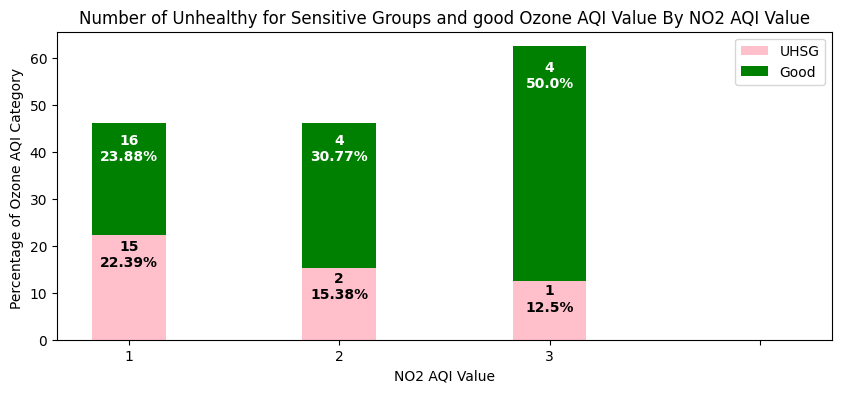

In [ ]:
from os import X_OK
airVeryUnHealth=air[air['PM2.5 AQI Category'] == 'Very Unhealthy'] #select Very Unhealthy PM2.5 AQI Category
air_NO2_Ozone=airVeryUnHealth.groupby(['NO2 AQI Value','Ozone AQI Category']) #group NO2 AQI Value and Ozone AQI Category
print(air_NO2_Ozone.size()) #print NO2 AQI Value and Ozone AQI Category and จำนวนแต่ละ Ozone AQI Category
print()

totalVeryUnHealth = air[air['PM2.5 AQI Category'] == 'Very Unhealthy'] #select Very Unhealthy PM2.5 AQI Category
totalOzoneGood = totalVeryUnHealth[totalVeryUnHealth['Ozone AQI Category'] == 'Good'] #select Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category

airNo2_1 = totalVeryUnHealth[totalVeryUnHealth['NO2 AQI Value'] == 1].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 1 ใน Very Unhealthy PM2.5 AQI Category
airNo2_2 = totalVeryUnHealth[totalVeryUnHealth['NO2 AQI Value'] == 2].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 2 ใน Very Unhealthy PM2.5 AQI Category
airNo2_3 = totalVeryUnHealth[totalVeryUnHealth['NO2 AQI Value'] == 3].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 3 ใน Very Unhealthy PM2.5 AQI Category

totalairNo2_1 = totalOzoneGood[totalOzoneGood['NO2 AQI Value'] == 1].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 1 ใน Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category
totalairNo2_2 = totalOzoneGood[totalOzoneGood['NO2 AQI Value'] == 2].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 2 ใน Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category
totalairNo2_3 = totalOzoneGood[totalOzoneGood['NO2 AQI Value'] == 3].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 3 ใน Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category

#สร้าง arry amountgood เพื่อใส่ totalairNo2_1
amountgood = []
amountgood.append(totalairNo2_1)
amountgood.append(totalairNo2_2)
amountgood.append(totalairNo2_3)

#สร้าง arry pergood เพื่อใส่ percentage
pergood = []
pct = (totalairNo2_1 / airNo2_1) * 100 #percent of NO2 AQI Value = 1 in Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category
pergood.append(round(pct,2)) #ทำเป็นทศนิยม 2 ตำแหน่ง
pct = (totalairNo2_2 / airNo2_2) * 100 #percent of NO2 AQI Value = 2 in Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category
pergood.append(round(pct,2))
pct = (totalairNo2_3 / airNo2_3) * 100 #percent of NO2 AQI Value = 3 in Good Ozone AQI Category in Very Unhealthy PM2.5 AQI Category
pergood.append(round(pct,2))
pergood.append(0)

totalInUHS = totalVeryUnHealth[totalVeryUnHealth['Ozone AQI Category'] == 'Unhealthy for Sensitive Groups'] #select Unhealthy for Sensitive Groups Ozone AQI Category in Very Unhealthy PM2.5 AQI Category

totalUHS_1 = totalInUHS[totalInUHS['NO2 AQI Value'] == 1].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 1 ใน Unhealthy for Sensitive Groups PM2.5 AQI Category
totalUHS_2 = totalInUHS[totalInUHS['NO2 AQI Value'] == 2].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 2 ใน Unhealthy for Sensitive Groups PM2.5 AQI Category
totalUHS_3 = totalInUHS[totalInUHS['NO2 AQI Value'] == 3].shape[0] #จำนวนของ NO2 AQI Value ที่มีค่า 3 ใน Unhealthy for Sensitive Groups PM2.5 AQI Category

#สร้าง arry amountUHS เพื่อใส่ totalUHS_1
amountUHS = []
amountUHS.append(totalUHS_1)
amountUHS.append(totalUHS_2)
amountUHS.append(totalUHS_3)

#สร้าง arry perUHS เพื่อใส่ percentage
perUHS = []
pct = (totalUHS_1 / airNo2_1) * 100 #percent of NO2 AQI Value = 1 in Unhealthy for Sensitive Groups PM2.5 AQI Category
perUHS.append(round(pct,2)) #ทำเป็นทศนิยม 2 ตำแหน่ง
pct = (totalUHS_2 / airNo2_2) * 100 #percent of NO2 AQI Value = 2 in Unhealthy for Sensitive Groups PM2.5 AQI Category
perUHS.append(round(pct,2))
pct = (totalUHS_3 / airNo2_3) * 100 #percent of NO2 AQI Value = 3 in Unhealthy for Sensitive Groups PM2.5 AQI Category
perUHS.append(round(pct,2))
perUHS.append(0)

plt.style.use('default') # This figure will be in default-style

X = ['1','2','3',''] #กำหนดค่าที่จะใส่ในแกน x

Good = (pergood[0], pergood[1], pergood[2], pergood[3]) #กำหนดค่าที่จะใส่ในแกน y ด้านบน ของแต่ละแท่ง
UHS = (perUHS[0], perUHS[1], perUHS[2], perUHS[3]) #กำหนดค่าที่จะใส่ในแกน y ด้านล่าง ของแต่ละแท่ง

ind = [x for x, _ in enumerate(X)] #วนลูปค่า X

fig = plt.subplots(figsize =(10, 4))

bar1 = plt.bar( ind, UHS, width=0.35, label='UHSG', color='pink') #กำหนด plot bar โดยมี แกนx, y , label, สีแต่ละ bar
bar2 = plt.bar( ind, Good, width=0.35, label='Good', color='green', bottom=UHS) #กำหนด plot bar โดยมี แกนx, y , label, สีแต่ละ bar และจะให้ UHS อยู่ด้านล่าง ส่วน Good จะอยู่ข้างบน

#วนลูปการเขียน percentage ใน bar plot ด้านล่าง
i = 0
keep = [] #สร้าง array keep เพื่อใส่ height
for  r in bar1:
    height = r.get_height()
    width = r.get_width()
    keep.append(height)
    if i < 3:
      plt.text(r.get_x() + width/2.0, height/1.05, s=f'{amountUHS[i]:,}\n{perUHS[i]}%', color="black", fontsize=10, fontweight="bold",ha='center', va ='top')
      i +=1

#วนลูปการเขียน percentage ใน bar plot ด้านบน
j = 0
for  x in bar2:
    height_2 = x.get_height()
    width_2 = x.get_width()
    if j < 3:
      plt.text(x.get_x() + width_2/2.0, (keep[j]+height_2)/1.05, s=f'{amountgood[j]:,}\n{pergood[j]}%', color="white", fontsize=10, fontweight="bold",ha='center', va ='top')
      j +=1

plt.xticks(ind,X)
plt.ylabel("Percentage of Ozone AQI Category ")
plt.xlabel("NO2 AQI Value")
plt.legend(loc="upper right") #loc label ไว้บนขวา
plt.title("Number of Unhealthy for Sensitive Groups and good Ozone AQI Value By NO2 AQI Value")
plt.show()

####Compute and plot the top-ten Global air pollution By PM2.5 AQI Value

Most of PM2.5 AQI Value for one, two, three or four.
7.52 percents.


   PM2.5 AQI Value  NumPM  NumPM_percent
0               50    455       2.138359
1               51    392       1.842278
2               52    398       1.870477
3               53    356       1.673090
4               54    408       1.917473
5               55    335       1.574396
6               56    336       1.579096
7               57    330       1.550898
8               58    322       1.513300
9               59    320       1.503901



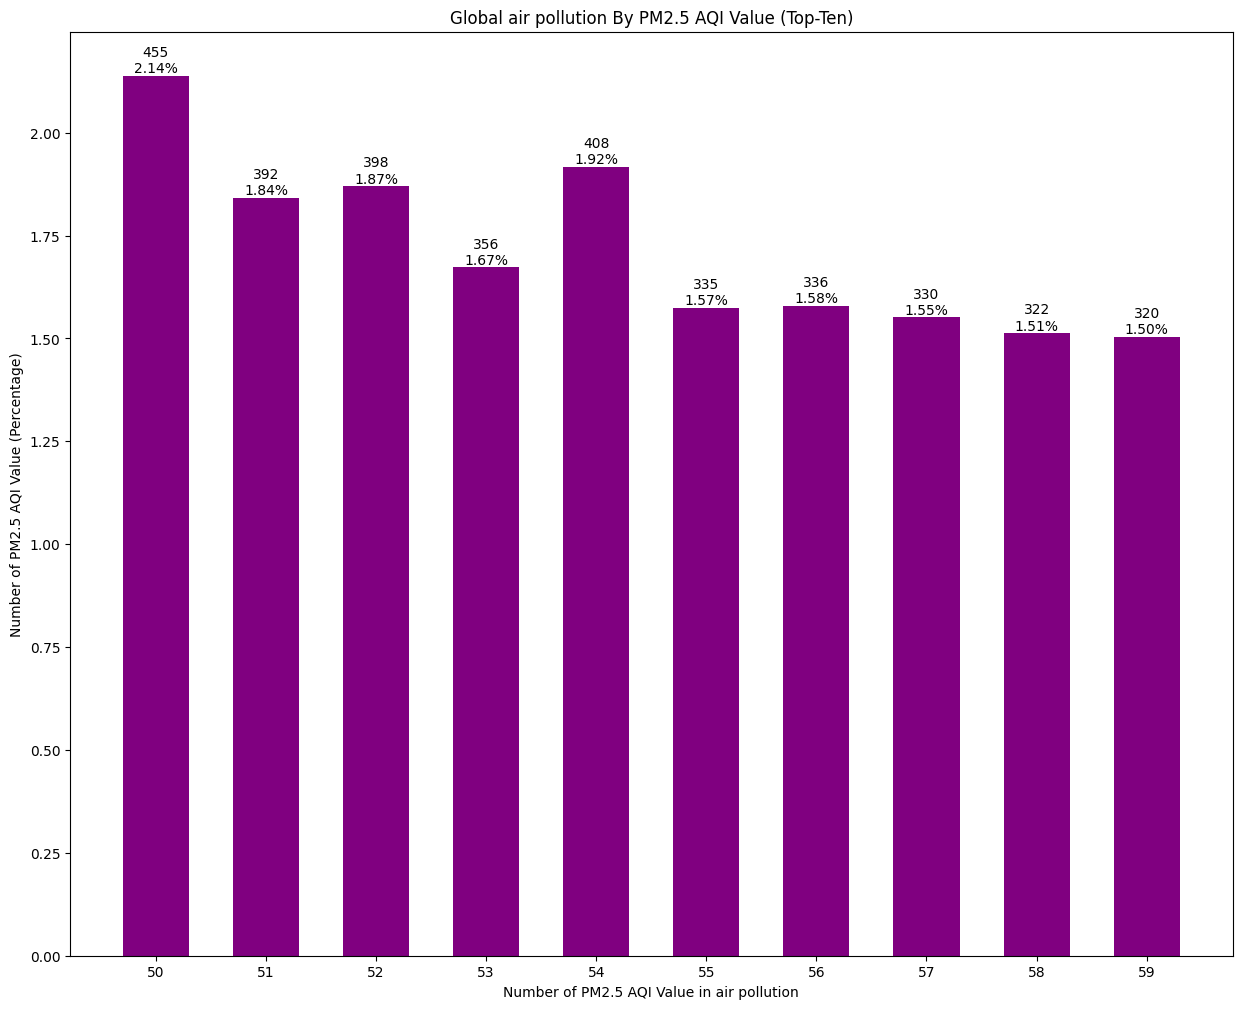

In [ ]:
airpm = air.groupby('PM2.5 AQI Value').size() # group PM2.5 AQI Value into size
totalpm = airpm.sum() #ผลรวมของ group PM2.5 AQI Value into size

totalTen = airpm.sort_values(ascending=False).head(10) #เอาแค่ 10 อันแรก
sort = totalTen.sort_index() #sort index

#สร้าง arry percent, total
percent = []
total = []
cnt = 0
#วนลูป sort.index
for i in sort.index:
    total.append(sort.values[cnt]) #ใส่ sort.values[cnt] ที่วนลูปได้ใส่ใน total
    percent.append(round(total[cnt]/totalpm*100,6)) #ใส่ percentage แต่ละรอบลงไปใน array percent
    cnt += 1

listair = {'PM2.5 AQI Value':sort.index, 'NumPM':total, 'NumPM_percent':percent} #จัด list ออกมา
air_frame = pd.DataFrame(listair) #เอา list มาสร้างเป็น dataframe
topFour = air_frame.NumPM_percent[0]+air_frame.NumPM_percent[1]+air_frame.NumPM_percent[2]+air_frame.NumPM_percent[3] #เอา percent 4 อันดับแรกมา
print('Most of PM2.5 AQI Value for one, two, three or four.')
print(f'{topFour:.2f} percents.\n\n') #ทศนิยม 2 ตำแหน่ง
print(air_frame)
print()

plt.style.use('default') # This figure will be in default-style

x = ['50','51','52','53','54','55','56','57','58','59'] #กำหนดค่าที่จะใส่ในแกน x
y = (air_frame.NumPM_percent) #กำหนดค่าที่จะใส่ในแกน y

fig = plt.subplots(figsize =(15, 12)) # fig size graph with weight=15, height=12

bar1 = plt.bar(x, y, width=0.6, color='purple') #กำหนด plot bar โดยมี แกนx, y, ความกว้าง 0.8, สีแต่ละ bar

#เขียนข้อความแต่ละแกน
plt.xlabel("Number of PM2.5 AQI Value in air pollution")
plt.ylabel("Number of PM2.5 AQI Value (Percentage)")
plt.title("Global air pollution By PM2.5 AQI Value (Top-Ten)")

#วนลูปการเขียน percentage และ จำนวน ใน bar plot บนแท่ง
i = 0
for r in bar1:
    height = r.get_height()
    width = r.get_width()
    plt.text(r.get_x() + width / 2 , height , f'{air_frame.NumPM[i]:,}\n{air_frame.NumPM_percent[i]:.2f}%' , ha='center', va='bottom')
    i+=1

plt.show() #show bar plot

####Compute and plot the number of Ozone AQI Value and CO AQI Value In Good NO2 AQI Category

                           Ozone_AQI_Value  CO_AQI_Value
Ozone_CO NO2 AQI Category                               
1        Good                            1             0
2        Good                           23            21
3        Good                          121            92
4        Good                          203           165
5        Good                          470           295
6        Good                          708           342
7        Good                          923           386
8        Good                         1118           370
9        Good                         1518           381
10       Good                         1792           408
11       Good                         2338           434
12       Good                         2511           369
13       Good                         2893           448
         Moderate                        1            12
14       Good                         3098           500
         Moderate              

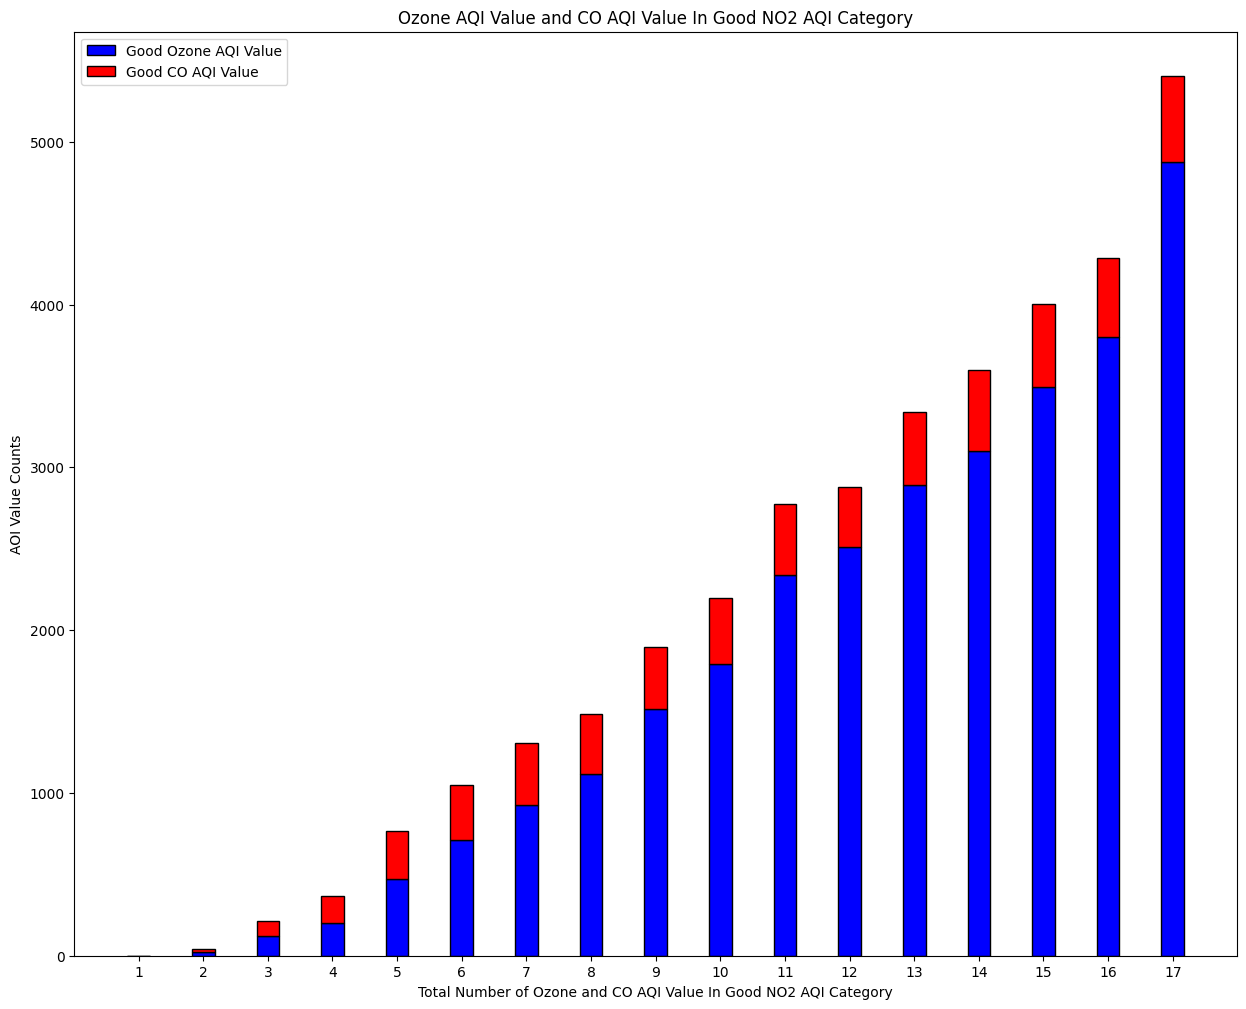

In [ ]:
air['Ozone_CO'] = air.loc[:, ['Ozone AQI Value','CO AQI Value']].sum(axis=1) ## เรียกใช้ group_sum.loc[] เป็น series เพื่อดึงข้อมูลชื่อของคอลัมน์ Ozone AQI Value, CO AQI Category รวมกันเป็น air['Ozone_CO']
totalair = air.groupby(['Ozone_CO', 'NO2 AQI Category']).agg(Ozone_AQI_Value=('Ozone AQI Value','sum'), CO_AQI_Value=('CO AQI Value','sum')).head(20) #group แต่ละอันออกมา 20 อัน
print(totalair.to_string()) #print to_string ของ totalair
print()

#สร้าง arry goodCO, goodOzone, ModerateCO, ModerateOzone
goodCO = []
goodOzone = []
ModerateCO = []
ModerateOzone = []
a = 0
#วนลูป totalair.index
for i in totalair.index:
    if (i[1] == 'Good'):
        goodOzone.append(totalair.values[a][0]) #array เก็บค่า totalair.values[0] ที่ละค่าถ้าเป็น good จะเก็บใส่ goodOzone
        goodCO.append(totalair.values[a][1]) #array เก็บค่า totalair.values[1] ที่ละค่าถ้าเป็น good จะเก็บใส่ goodCO
    else:
        ModerateOzone.append(totalair.values[a][0]) #array เก็บค่า totalair.values[0] ที่ละค่าถ้าเป็น Moderate จะเก็บใส่ ModerateOzone
        ModerateCO.append(totalair.values[a][1]) #array เก็บค่า totalair.values[0] ที่ละค่าถ้าเป็น Moderate จะเก็บใส่ ModerateCO
    a += 1

plt.style.use('default') # This figure will be in default-style

x = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'] #กำหนดค่าที่จะใส่ในแกน x

#กำหนดค่าที่จะใส่ในแกน y
goodO = (goodOzone)
ModerateO = (ModerateOzone)
goodC = (goodCO)
ModerateC = (ModerateCO)

X_axis = np.arange(len(x))

fig = plt.subplots(figsize =(15, 12)) # fig size graph with weight=15, height=12

plt.bar( X_axis, goodO, width=0.35, label='Good Ozone AQI Value', color='blue', edgecolor = 'black') #กำหนด plot bar โดยมี แกนx, y ของ goodO, label, สีแต่ละ bar
plt.bar( X_axis, goodC, width=0.35, label='Good CO AQI Value', color='red', bottom=goodO, edgecolor = 'black') #กำหนด plot bar โดยมี แกนx, y ของ goodC, label, สีแต่ละ bar และจะให้ goodO อยู่ด้านล่าง ส่วน goodC จะอยู่ข้างบน

plt.xticks(X_axis, x)
plt.xlabel("Total Number of Ozone and CO AQI Value In Good NO2 AQI Category")
plt.ylabel("AOI Value Counts")
plt.title("Ozone AQI Value and CO AQI Value In Good NO2 AQI Category")
plt.legend()
plt.show()